## C1P11

### Compare the results obtained using the Bisection Method, Newton's Method and the Secant Method to solve the equation $ln(x) + x^2 = 3$. Note that Python code for these methods is available on I-learn.

### i. Solve the problem using each of the three methods.

### ii. Plot the errors on the same graph using a logarithmically scaled y-axis.

### Explain your plot. In particular, what does the theory say about the rate of convergence for each method? Are your results consistent with this theory?


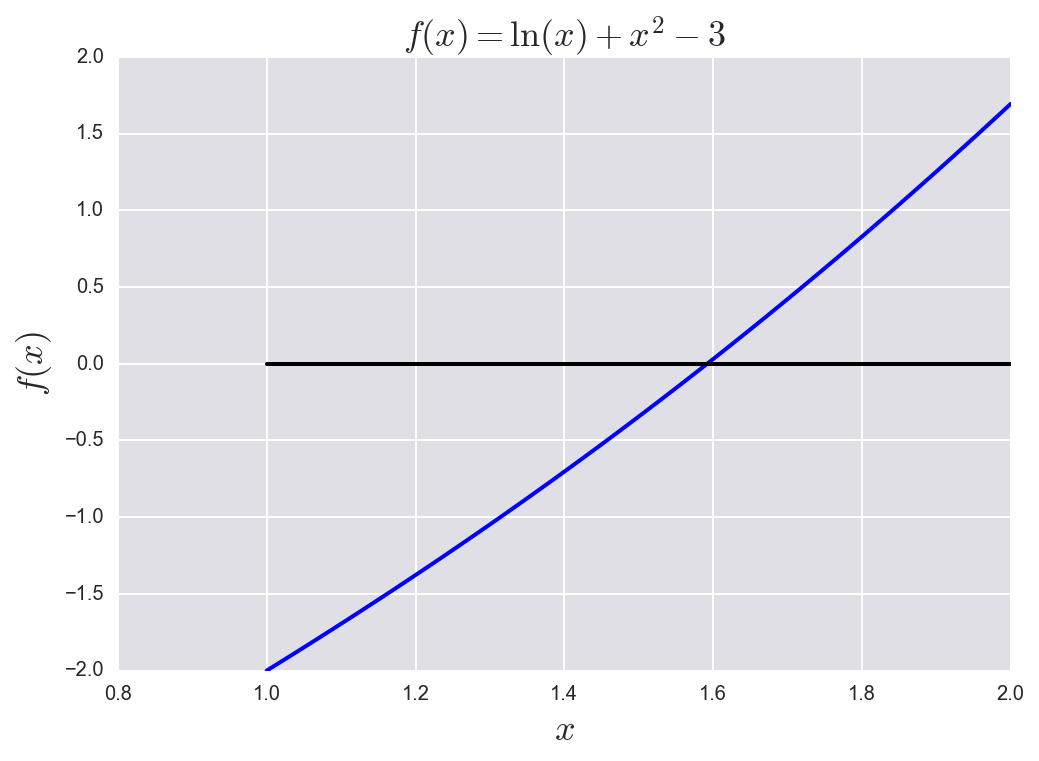

In [1]:
# import needed libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Magic function to make matplotlib inline; other style specs must come AFTER
%matplotlib inline

# This enables high resolution PNGs.
%config InlineBackend.figure_formats = {'png', 'retina'}

# Some Seaborn settings for notebooks
rc = {'lines.linewidth': 2, 
      'axes.labelsize': 18, 
      'axes.titlesize': 18, 
      'axes.facecolor': 'DFDFE5'}
sns.set_context('notebook', rc=rc)
sns.set_style('darkgrid', rc=rc)

# define f(x) and f'(x)
def f(x):
    return np.log(x) + np.power(x,2) - 3
def fp(x):
    return np.power(x,-1) + 2*x

# Plot f(x)
x = np.linspace(1.0, 2.0, 100, endpoint=True)
y1 = f(x)
y2 = np.zeros(y1.size)
plt.plot(x, y1, 'b-', x, y2, 'k-')
plt.title('$f(x)=\ln(x)+x^2-3$')
plt.xlabel('$x$')
plt.ylabel('$f(x)$')
plt.show()

### Find the root using Bisection Method with $a=1$ and $b=2$, Newton's Method with $x_0 = 0.5$ and the Secant Method with $x_0 = 0.4$ and $x_1 = 0.5$. For each method, return the sequence of approximations at each step. Run each method until there are $8$ decimal places of accuracy.

In [4]:
# import my library that contains Bisection, Newton, and Secant methods
import mylib as my

# solve using Bisection method
# define error toleracne
tol = 1.0e-8
rb = my.bisect(f, 1.0, 2.0, tol)

# print results, the first thing returned is the approximate root,
# the second thing is the number of iterations
print('Bisection method approximate root = %12.10f' % rb[rb.size-1])
print('number of iterations = %d \n' % rb.size)

# solve using Newton's method
x0 = 0.5
k = 5
rn = my.newton(f, fp, x0, k)
print('Newton method approximate root = %12.10f' % rn[rn.size-1])
print('number of iterations = %d \n' % rn.size)

# solve using Secant method
x0 = 0.4
x1 = 0.5
k = 6
rs = my.secant(f, x0, x1, k)
print('Secant method approximate root = %12.10f' % rs[rs.size-1])
print('number of iterations = %d \n' % rs.size)

Bisection method approximate root = 1.5921429321
number of iterations = 27 

Newton method approximate root = 1.5921429371
number of iterations = 5 

Secant method approximate root = 1.5921429371
number of iterations = 6 



## Plot the errors on the same plot.

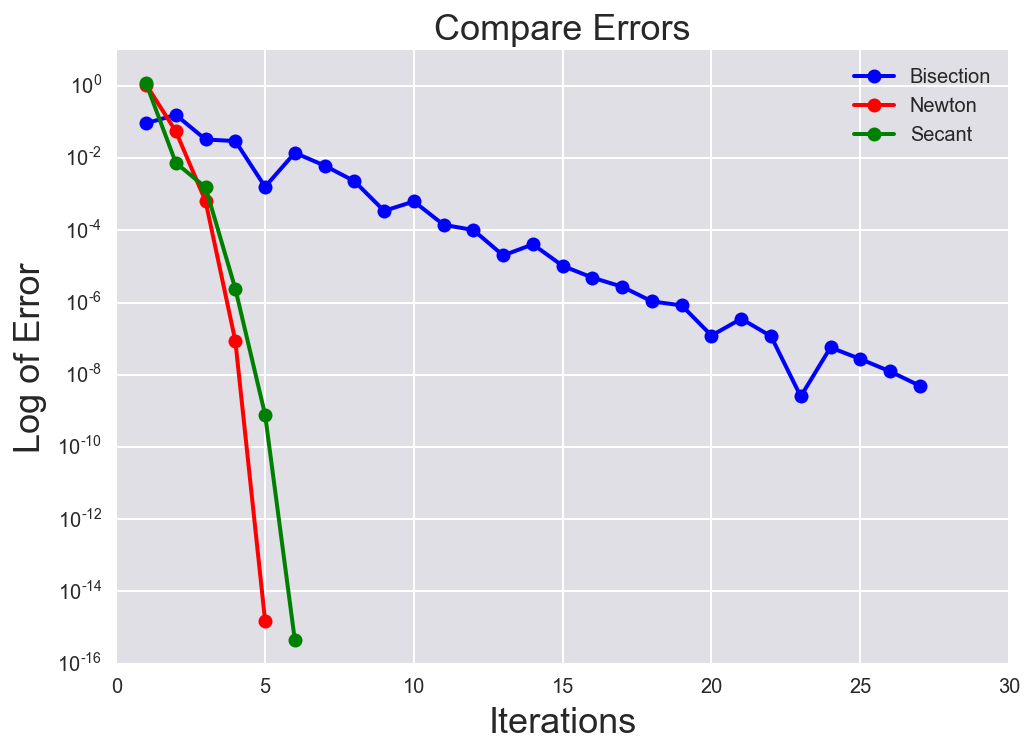

In [5]:
root = 1.592142937058094

ib = np.arange(1, rb.size+1)
eb = np.abs(rb-np.ones(rb.size)*root)
plt.semilogy(ib, eb, 'bo-', label = 'Bisection')

inn = np.arange(1, rn.size+1)
en = np.abs(rn-np.ones(rn.size)*root)
plt.semilogy(inn, en, 'ro-', label = 'Newton')

iss = np.arange(1, rs.size+1)
es = np.abs(rs-np.ones(rs.size)*root)
plt.semilogy(iss, es, 'go-', label = 'Secant')

plt.title('Compare Errors')
plt.xlabel('Iterations')
plt.ylabel('Log of Error')
plt.legend(loc='upper right')
plt.show()

### The theory says the following.

### Bisection always converges linearly with rate $\frac{1}{2}$. Since $f^{\prime}(r) = 3.81237 \neq 0$ we conclude the multiplicity of $r$ is $1$ and Newton's method converges quadratically. Similary, the order of convergence of the Secant method is about $1.62$ (see p. 61). We will show that the computations are consistent with the theory.

### For Bisection we will compute $S$ where $S = \frac{e_{k+1}}{e_k}$.

### For Newton and Secant we will compute $\alpha$ where $\alpha = \frac{\log(e_{k+1}) - \log(e_{k})}{\log(e_{k}) - \log(e_{k-1})}$

In [6]:
sb = eb[eb.size-2]/eb[eb.size-3]
print('computed Bisection slope = %6.4f' % sb)

an = (np.log(en[en.size-1]) - np.log(en[en.size-2]))/(np.log(en[en.size-2]) - np.log(en[en.size-3]))
print('computed Newton alpha = %6.4f' % an)

alphas = (np.log(es[es.size-1]) - np.log(es[es.size-2]))/(np.log(es[es.size-2]) - np.log(es[es.size-3]))
print('computed Secant alpha = %6.4f' % alphas)

computed Bisection slope = 0.4540
computed Newton alpha = 2.0024
computed Secant alpha = 1.7924


### We observe the computed slope for Bisection is $0.454$ which is in the same ballpark as the theoretical value of $0.5$.

### The computed $\alpha$ for Newton is $2.0024$ which is very close to the theoretical value of $2.0$.

### The computed $\alpha$ for Secant is $1.7924$ which is in the same ballpark as the theoretical value of $1.62$.